<h3>Middle East Technical University</h3>
<h1><center>IS 509</center></h1>
<h3><center>Introduction to Data Science</center></h3>
<h4><center>Term Project - Phase 2</center></h4>
<h5><center>Prepared By: Mert Mecit/2149219</center></h5>

This report is prepared for IS 509 - Introduction to Data Science course's term project. For each question, first I explain the methodology and reasoning I will be using. Then, I will present my codes. And finally, I will make comments where necessary.

<h3>Question 1</h3>

First, I will present all the libraries I will be using throughout this project.

In [1]:
import pandas as pd
import scipy.stats as ss
import numpy as np
from IPython.display import HTML
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.imputation.mice as mice
from sklearn import metrics
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1"

pd.options.mode.chained_assignment = None 

Then, I upload data as a pandas object and show first 5 lines of our data.

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\data.csv")

data.head(5)

,x1,x2,x3,x4,x5,y
0,3,medium,B,71.873539,77.279942,0
1,2,medium,C,76.329693,123.509762,3
2,2,medium,B,84.726817,94.113034,0
3,1,low,D,90.894953,131.080126,0
4,1,medium,B,91.377552,78.421426,1


We can also check shape of our dataframe.

In [3]:
data.shape

(210, 6)

As we can see, x2 and x3 variables has string or character values. In my opinion, dealing with numerical values is much more easier, so I convert them to numerical values.

In [4]:
data['x2'] = data['x2'].replace(['low'],1)
data['x2'] = data['x2'].replace(['medium'],2)
data['x2'] = data['x2'].replace(['high'],3)
data['x3'] = data['x3'].replace(['A'],1)
data['x3'] = data['x3'].replace(['B'],2)
data['x3'] = data['x3'].replace(['C'],3)
data['x3'] = data['x3'].replace(['D'],4)

data.head(5)

,x1,x2,x3,x4,x5,y
0,3,2,2,71.873539,77.279942,0
1,2,2,3,76.329693,123.509762,3
2,2,2,2,84.726817,94.113034,0
3,1,1,4,90.894953,131.080126,0
4,1,2,2,91.377552,78.421426,1


Now, we can check descriptive statistics for our variables.

In [5]:
data.describe()

,x1,x2,x3,x4,x5,y
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2.019048,1.971429,3.004762,79.905313,98.285305,1.352381
std,0.788445,0.535034,0.925439,11.009680,22.439716,1.123741
min,0.000000,1.000000,1.000000,58.399838,33.796804,0.000000
25%,1.250000,2.000000,2.000000,70.818654,81.332897,0.000000
50%,2.000000,2.000000,3.000000,78.280164,98.482971,1.000000
75%,3.000000,2.000000,4.000000,89.267688,115.910668,2.000000
max,4.000000,3.000000,4.000000,113.872106,141.824291,3.000000


Descriptive statistics give insight about possible distributions. However, I believe visualization is a better technique to understand general information about variables, so I will visualize each variable with proper visualization methods. (Bins are selected to provide best visualization, they do not have any other purposes.)

<AxesSubplot:>

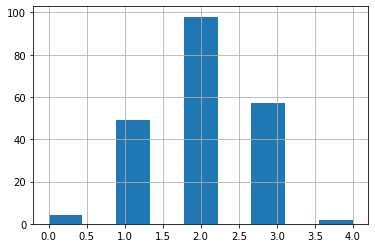

In [6]:
data["x1"].hist(bins=9)

x1 -> This variable takes integer values between 0 and 4. By looking at mean and percentiles, we can say that this variable is almost normally distributed. Most of the values are 2 (in the middle), considerable amount of 1 and 3 are here and very low amount of observations are on the edge values, 0 and 4.

<AxesSubplot:>

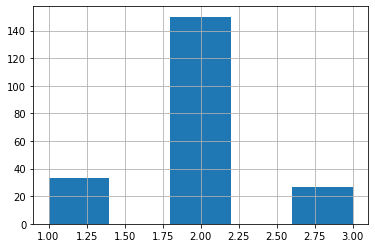

In [7]:
data["x2"].hist(bins=5)

In [8]:
data['x2'].value_counts(normalize=True)

2    0.714286
1    0.157143
3    0.128571
Name: x2, dtype: float64

x2 -> This variable is ordinal. 1 is for low, 2 is for medium, 3 is for high. We can clearly see that most of our data consist of entries with medium x2 value.

<AxesSubplot:>

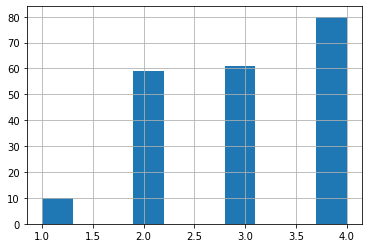

In [9]:
data["x3"].hist(bins=10)

In [10]:
data['x3'].value_counts(normalize=True)

4    0.380952
3    0.290476
2    0.280952
1    0.047619
Name: x3, dtype: float64

x3 -> This variable is nominal, not ordinal. 1 is for 'A', 2 is for 'B', 3 is for 'C' and 4 is for 'D'. We can see that most of the entries have D for x2 and A is the least common one, 'B' and 'C' are quite common as well.

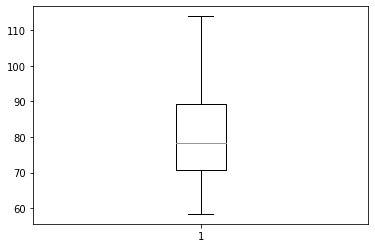

In [11]:
plt.boxplot(data["x4"])
plt.show()

<AxesSubplot:>

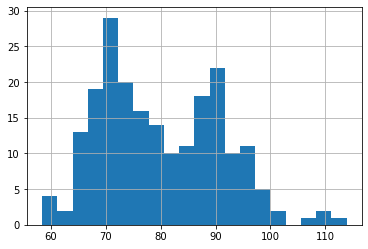

In [12]:
data["x4"].hist(bins=20)

x4 -> This variables takes continuous values between ~58 and ~114. Median is about 79 (from box plot). It has a mean of ~80 (from descriptive table) and a standard deviation of ~11. This variable is relatively right-skewed towards mean (from histogram) but still we have a lot of observartions around 90.

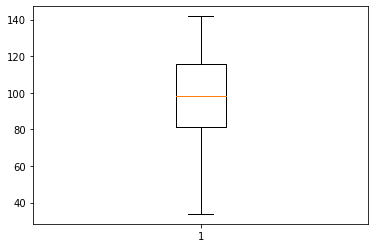

In [13]:
plt.boxplot(data["x5"])
plt.show()

<AxesSubplot:>

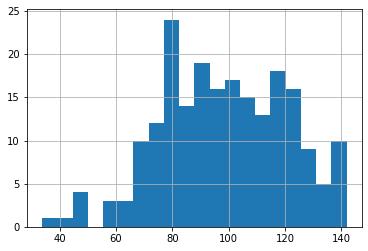

In [14]:
data["x5"].hist(bins=20)

x5 -> This variables takes continuous values between ~34 and ~142. Median is about 100 (from box plot). It has a mean of ~99 (from descriptive table) and a standard deviation of ~22. This variable is not highly skewed (from histogram) as we have a lot of observations lower and higher than mean.

<AxesSubplot:>

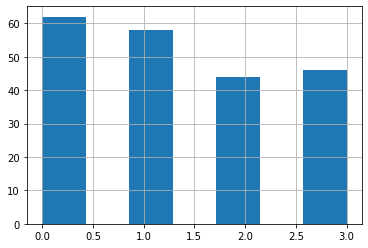

In [15]:
data["y"].hist(bins=7)

In [16]:
data['y'].value_counts(normalize=True)

0    0.295238
1    0.276190
3    0.219048
2    0.209524
Name: y, dtype: float64

y -> This is our target class and it is nominal. It takes integer values between 0-3. We can see from the distribution it takes 0 as the most value then comes 1, 3 and 2 but frequencies are very close to each other.

<h3>Question 2</h3>

Here, I will try to determine which attribute is more informative about our target class, Y. First, I will try to look at correlation matrix. Correlation can be a good estimation for our purpose as it looks for statistical relationship between two variables.

In [17]:
data.corr()

,x1,x2,x3,x4,x5,y
x1,1.000000,0.114719,0.026105,-0.886957,-0.353609,0.613420
x2,0.114719,1.000000,0.019603,0.054856,-0.606791,0.231693
x3,0.026105,0.019603,1.000000,-0.041766,0.330263,0.002980
x4,-0.886957,0.054856,-0.041766,1.000000,0.236410,-0.595002
x5,-0.353609,-0.606791,0.330263,0.236410,1.000000,-0.368028
y,0.613420,0.231693,0.002980,-0.595002,-0.368028,1.000000


Here, we can see y has highest correlation with x1 variable. This result is okay, but I guess correlation has several drawback such as:
1) It is heavily based on mean of the variables and mean is not meaningful at all for some of our variables such as x2 and x3
2) We are searching for a variable that is informative about y. However, correlation has no direction.

So, although correlation is a powerful tool, I will use adjusted R squared as it explains to what extent the variance of one variable explains the variance of the second variable (y). I will do a simple linear regression between each variable and y and find corresponding R squared.

In [18]:
for i in {'x1','x2','x3','x4','x5'}:    
    model = sm.OLS(data['y'], data[i]).fit()
    x = model.rsquared_adj
    print('Adjusted R-squared between our target variable and {} is {}'.format(i,x))

Adjusted R-squared between our target variable and x3 is 0.5402142327950825
Adjusted R-squared between our target variable and x1 is 0.7374385738456413
Adjusted R-squared between our target variable and x4 is 0.5031492508868354
Adjusted R-squared between our target variable and x2 is 0.6092946508261337
Adjusted R-squared between our target variable and x5 is 0.48543954258149924


As we can see, x1 also has highest R square alone. We can say that x1's explanatory power on y is the greatest among 5 variables. So, for our next steps, I have chosen x1.

<h3>Question 3</h3>

<h4>Part a</h4>

To be MCAR, we need a complete randomness on missing data. To achieve so, I have formulated a function that creates completely random unique numbers between 0 and our row length. Then for each chosen number, corresponding row's x1 value is converted to null. Notice, a seed is used to gather consistent results.

In [19]:
def createRandomSortedList(num, start = 0, end = data.shape[0]-1):
    
    random.seed(101)
    
    arr = []
    tmp = random.randint(start, end)
      
    for x in range(num):
          
        while tmp in arr:
            tmp = random.randint(start, end)
              
        arr.append(tmp)
          
    arr.sort()
      
    return arr

I create my new pandas object, mcar20

In [20]:
mcar20 = data.copy()

I use my function above and apply it to my mcar20 dataframe.

In [21]:
x = createRandomSortedList(int(data.shape[0]*0.2))

for i in x:
    mcar20['x1'][i] = np.nan

Now, check whether our mcar20 dataframe is similar to our original data.

In [22]:
mcar20.head(10)

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,1.0,2,2,91.377552,78.421426,1
5,2.0,1,4,82.418660,128.847297,0
6,2.0,3,4,87.124463,82.339298,1
7,2.0,2,4,77.472105,87.934054,3
8,2.0,2,4,74.768722,95.439607,3
9,2.0,2,2,71.275161,91.463072,2


As it is similar, now we can check how many missing values are there in x1 variable of mcar20.

In [23]:
mcar20['x1'].isna().sum()

42

We have 42 missing values (210 * 0.2 = 42) and we did this in a completely random manner. However, MCAR have two assumptions we have to test them. 1) Missingness cannot depend on value of other variables, or 
2) Value of itself.

To check first assumption I will use function below to create missingness table.

In [24]:
def create_missingness_map(mis_data):
    columns=mis_data.columns
    mis_map=pd.DataFrame(data=np.zeros(mis_data.shape), columns=mis_data.columns, dtype=int)
    for col in columns:
        col_mis_index=mis_data[mis_data[col].isnull()].index
        mis_map.loc[col_mis_index,col]=1    
    return mis_map

In [25]:
mis_map=create_missingness_map(mcar20)
mis_map.head(14)

,x1,x2,x3,x4,x5,y
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


I crate a new dataframe by changing mcar20's x1 with missingness data. So, I can calculate correlation between dataframe.

In [26]:
mcar20x = mcar20.drop('x1', 1)
mcar20x['x1'] = mis_map['x1']
mcar20x.head(20)

,x2,x3,x4,x5,y,x1
0,2,2,71.873539,77.279942,0,0
1,2,3,76.329693,123.509762,3,0
2,2,2,84.726817,94.113034,0,0
3,1,4,90.894953,131.080126,0,0
4,2,2,91.377552,78.421426,1,0
5,1,4,82.418660,128.847297,0,0
6,3,4,87.124463,82.339298,1,0
7,2,4,77.472105,87.934054,3,0
8,2,4,74.768722,95.439607,3,0
9,2,2,71.275161,91.463072,2,0


In [27]:
mcar20x.corr()

,x2,x3,x4,x5,y,x1
x2,1.000000,0.019603,0.054856,-0.606791,0.231693,-0.040147
x3,0.019603,1.000000,-0.041766,0.330263,0.002980,-0.067052
x4,0.054856,-0.041766,1.000000,0.236410,-0.595002,-0.017305
x5,-0.606791,0.330263,0.236410,1.000000,-0.368028,-0.113463
y,0.231693,0.002980,-0.595002,-0.368028,1.000000,0.012743
x1,-0.040147,-0.067052,-0.017305,-0.113463,0.012743,1.000000


As we can see, with x1, almost every other variable have no correlation. So, we can conclude missingness of x1 is not dependent on any other variable in our dataset in the mcar20 dataset that we created.

Now, we can go back to our mcar20 database and check our second assumption, missigness should not rely on value itself.

In [28]:
x1_miss = mcar20.loc[mcar20['x1'].notnull()]
x1_miss = x1_miss[['x1']]
x1_no_miss = data[['x1']]

Here I have two databases, each has only x1 variable. x1_miss has only non-missing values whereas x1_no_miss has all the values. My assumption is, if there is a significant difference between their means, there can be a problem as missingness can be a result of value itself. So, I apply a t test to them with null hypothesis of there is no difference between means and alternative hypothesis of difference between means.

In [29]:
stat, p = ss.ttest_ind(x1_miss, x1_no_miss)
p = str(p)
print("p value is:" + p)

p value is:[0.75708458]


As we have too high p value, we fail to reject the null hypothesis of no differece between means.

So, I believe I have provided two requirements to be mcar in my database. I completely created random missing values and proved that missingness are 1)independent of other variables and 2)independent of value itself. So, I can create my excel file now.

In [30]:
mcar20.to_csv(r'C:\Users\Lenovo\Desktop\mcar20.csv')

<h4>Part b</h4>

I create my new pandas object, mcar40

In [31]:
mcar40 = data.copy()

I use my function above and apply it to my mcar40 dataframe.

In [32]:
x = createRandomSortedList(round(data.shape[0]*0.4))

for i in x:
    mcar40['x1'][i] = np.nan

Now, check whether our mcar20 dataframe is similar to our original data.

In [33]:
 mcar40.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,NaN,2,3,76.329693,123.509762,3
2,NaN,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,1.0,2,2,91.377552,78.421426,1


As it is similar, now we can check how many missing values are there in x1 variable of mcar40.

In [34]:
mcar40['x1'].isna().sum()

84

We have 84 missing values (210 * 0.4 = 84) and we did this in a completely random manner. However, MCAR have two assumptions we have to test them. 1) Missingness cannot depend on value of other variables, or 2) Value of itself.

To check first assumption I will use function above to create missingness table.

In [35]:
mis_map=create_missingness_map(mcar40)
mis_map.head(14)

,x1,x2,x3,x4,x5,y
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,1,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,1,0,0,0,0,0
9,0,0,0,0,0,0


I crate a new dataframe by changing mcar20's x1 with missingness data. So, I can calculate correlation between dataframe.

In [36]:
mcar40x = mcar40.drop('x1', 1)
mcar40x['x1'] = mis_map['x1']
mcar40x.head(20)

,x2,x3,x4,x5,y,x1
0,2,2,71.873539,77.279942,0,0
1,2,3,76.329693,123.509762,3,1
2,2,2,84.726817,94.113034,0,1
3,1,4,90.894953,131.080126,0,0
4,2,2,91.377552,78.421426,1,0
5,1,4,82.418660,128.847297,0,1
6,3,4,87.124463,82.339298,1,0
7,2,4,77.472105,87.934054,3,0
8,2,4,74.768722,95.439607,3,1
9,2,2,71.275161,91.463072,2,0


In [37]:
mcar40x.corr()

,x2,x3,x4,x5,y,x1
x2,1.000000,0.019603,0.054856,-0.606791,0.231693,-0.010927
x3,0.019603,1.000000,-0.041766,0.330263,0.002980,-0.035797
x4,0.054856,-0.041766,1.000000,0.236410,-0.595002,-0.044661
x5,-0.606791,0.330263,0.236410,1.000000,-0.368028,-0.055459
y,0.231693,0.002980,-0.595002,-0.368028,1.000000,0.046821
x1,-0.010927,-0.035797,-0.044661,-0.055459,0.046821,1.000000


As we can see, with x1, almost every other variable have no correlation. So, we can conclude missingness of x1 is not dependent on any other variable in our dataset in the mcar40 dataset that we created.

Now, we can go back to our mcar20 database and check our second assumption, missigness should not rely on value itself.

In [38]:
x1_miss = mcar40.loc[mcar40['x1'].notnull()]
x1_miss = x1_miss[['x1']]
x1_no_miss = data[['x1']]

Here I have two databases, each has only x1 variable. x1_miss has only non-missing values whereas x1_no_miss has all the values. My assumption is, if there is a significant difference between their means, there can be a problem as missingness can be a result of value itself. So, I apply a t test to them with null hypothesis of there is no difference between means and alternative hypothesis of difference between means.

In [39]:
stat, p = ss.ttest_ind(x1_miss, x1_no_miss)
p = str(p)
print("p value is:" + p)

p value is:[0.62414672]


As we have too high p value, we fail to reject the null hypothesis of no differece between means.

So, I believe I have provided two requirements to be mcar in my database. I completely created random missing values and proved that missingness are 1)independent of other variables and 2)independent of value itself. So, I can create my excel file now.

In [40]:
mcar40.to_csv(r'C:\Users\Lenovo\Desktop\mcar40.csv')

<h4>Part c</h4>

To be MAR, missing values should depend on the value of one or more other variables but it should not depend on the value of itself. For this purpose, as I have already established a high correlation between x1 and x4 (see question 2 above), I used a relationship between x1 and x4 to create a MAR. First, I create mar20.

In [41]:
mar20 = data.copy()

I find indexes of entities that have x4 value lower than 78 (almost median) and save it as a list.

In [42]:
alist = data.index[(data['x4'] < 78)].tolist()

Then, I create random unique numbers from that list that has exactly same amount of our required missing amount.

In [43]:
random.seed(101)
randomlist = random.sample(alist, k=42)

Then, I make all of x1 values for corresponding indexes null.

In [44]:
for i in randomlist:
    mar20['x1'][i] = np.nan

Now, check whether our mcar20 dataframe is similar to our original data.

In [45]:
mar20.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,1.0,2,2,91.377552,78.421426,1


As it is similar, now we can check how many missing values are there in x1 variable of mar20.

In [46]:
mar20['x1'].isna().sum()

42

We have 42 missing values (210 * 0.2 = 42) and we did this with relating missingness to other variables (in my example, y). However, MAR have two assumptions we have to test them. 1) Missingness should depend on value of other variables and 2) Not to value of itself.

To check first assumption I will use function above to create missingness table.

In [47]:
mis_map=create_missingness_map(mar20)
mis_map.head(14)

,x1,x2,x3,x4,x5,y
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


I crate a new dataframe by changing mcar20's x1 with missingness data. So, I can calculate correlation between dataframe.

In [48]:
mar20x = mar20.drop('x1', 1)
mar20x['x1'] = mis_map['x1']
mar20x.head(20)

,x2,x3,x4,x5,y,x1
0,2,2,71.873539,77.279942,0,0
1,2,3,76.329693,123.509762,3,0
2,2,2,84.726817,94.113034,0,0
3,1,4,90.894953,131.080126,0,0
4,2,2,91.377552,78.421426,1,0
5,1,4,82.418660,128.847297,0,0
6,3,4,87.124463,82.339298,1,0
7,2,4,77.472105,87.934054,3,0
8,2,4,74.768722,95.439607,3,0
9,2,2,71.275161,91.463072,2,0


In [49]:
mar20x.corr()

,x2,x3,x4,x5,y,x1
x2,1.000000,0.019603,0.054856,-0.606791,0.231693,-0.017843
x3,0.019603,1.000000,-0.041766,0.330263,0.002980,-0.015474
x4,0.054856,-0.041766,1.000000,0.236410,-0.595002,-0.439018
x5,-0.606791,0.330263,0.236410,1.000000,-0.368028,-0.110723
y,0.231693,0.002980,-0.595002,-0.368028,1.000000,0.352557
x1,-0.017843,-0.015474,-0.439018,-0.110723,0.352557,1.000000


As we can see x1 have high to moderate correlation with x4 and moderate correlation with y variables. So, we can conclude missingness of x1 is dependentant on x4.

Now, we can go back to our mar20 database and check our second assumption, missigness should not rely on value itself.

In [50]:
x1_miss = mar20.loc[mar20['x1'].notnull()]
x1_miss = x1_miss[['x1']]
x1_no_miss = data[['x1']]

Here I have two databases, each has only x1 variable. x1_miss has only non-missing values whereas x1_no_miss has all the values. My assumption is, if there is a significant difference between their means, there can be a problem as missingness can be a result of value itself. So, I apply a t test to them with null hypothesis of there is no difference between means and alternative hypothesis of difference between means.

In [51]:
stat, p = ss.ttest_ind(x1_miss, x1_no_miss)
p = str(p)
print("p value is:" + p)

p value is:[0.0629778]


As we have p value higher than 0.05 (genaral cutoff point), we fail to reject the null hypothesis of no differece between means.

So, I believe I have provided two requirements to be mcar in my database. I created random missing values dependant on x4 and proved that missingness are 1)dependent of other variables and 2)independent of value itself. So, I can create my excel file now.

In [52]:
mar20.to_csv(r'C:\Users\Lenovo\Desktop\mar20.csv')

<h4>Part d</h4>

To be MNAR, missing values should depend on the value of itself. First, I create my mnar20 dataframe.

In [53]:
mnar20 = data.copy()

I find indexes of entities that have x1 value of either 0 or 1 and save it as a list.

In [54]:
blist = data.index[(data['x1'] == 0) | (data['x1'] == 1)].tolist()

Then, I create random unique numbers from that list that has exactly same amount of our required missing amount.

In [55]:
random.seed(101)
randomlist = random.sample(blist, k=42)

Then, I make all of x1 values for corresponding indexes null.

In [56]:
for i in randomlist:
    mnar20['x1'][i] = np.nan

Now, check whether our mcar20 dataframe is similar to our original data.

In [57]:
mnar20.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,NaN,2,2,91.377552,78.421426,1


As it is similar, now we can check how many missing values are there in x1 variable of mnar20.

In [58]:
mnar20['x1'].isna().sum()

42

We have 42 missing values (210 * 0.2 = 42) here. However, MNAR have one assumption and we have to test it. 1) Missingness should depend on value of itself.

Now, we check assumption, missigness should rely on value itself.

In [59]:
x1_miss = mnar20.loc[mnar20['x1'].notnull()]
x1_miss = x1_miss[['x1']]
x1_no_miss = data[['x1']]

x1_miss.describe()

,x1
count,168.000000
mean,2.297619
std,0.604965
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [60]:
x1_no_miss.describe()

,x1
count,210.000000
mean,2.019048
std,0.788445
min,0.000000
25%,1.250000
50%,2.000000
75%,3.000000
max,4.000000


Here I have two databases, each has only x1 variable. x1_miss has only non-missing values whereas x1_no_miss has all the values. My assumption is, if there is a significant difference between their means, there can be a problem as missingness can be a result of value itself. So, I apply a t test to them with null hypothesis of there is no difference between means and alternative hypothesis of difference between means.

In [61]:
stat, p = ss.ttest_ind(x1_miss, x1_no_miss)
p = str(p)
print("p value is:" + p)

p value is:[0.00018547]


As we have too low p value, we reject the null hypothesis of no differece between means and accept alternative hypothesis.

So, I believe I have provided the requirement to be mnar in my database. I created random missing values based on their values. So, I can create my excel file now.

In [62]:
mnar20.to_csv(r'C:\Users\Lenovo\Desktop\mnar20.csv')

<h3>Question 4</h3>

<h4>Part a</h4>

Here, to deal with missing values, we are asked to delete the feature competely. I do it by passing all of columns of dataframes that we created in question 3, except x1. To show that those dataframes have same amount of rows but column size is decreased by 1, I have shown shapes as well. Then, correspoding csv files are created.

In [63]:
mcar20df = mcar20.loc[:, mcar20.columns != 'x1']
mcar20df.head()

,x2,x3,x4,x5,y
0,2,2,71.873539,77.279942,0
1,2,3,76.329693,123.509762,3
2,2,2,84.726817,94.113034,0
3,1,4,90.894953,131.080126,0
4,2,2,91.377552,78.421426,1


In [64]:
mcar20df.shape

(210, 5)

In [65]:
mcar20df.to_csv(r'C:\Users\Lenovo\Desktop\mcar20df.csv')

In [66]:
mcar40df = mcar40.loc[:, mcar40.columns != 'x1']
mcar40df.head()

,x2,x3,x4,x5,y
0,2,2,71.873539,77.279942,0
1,2,3,76.329693,123.509762,3
2,2,2,84.726817,94.113034,0
3,1,4,90.894953,131.080126,0
4,2,2,91.377552,78.421426,1


In [67]:
mcar40df.shape

(210, 5)

In [68]:
mcar40df.to_csv(r'C:\Users\Lenovo\Desktop\mcar40df.csv')

In [69]:
mar20df = mar20.loc[:, mar20.columns != 'x1']
mar20df.head()

,x2,x3,x4,x5,y
0,2,2,71.873539,77.279942,0
1,2,3,76.329693,123.509762,3
2,2,2,84.726817,94.113034,0
3,1,4,90.894953,131.080126,0
4,2,2,91.377552,78.421426,1


In [70]:
mar20df.shape

(210, 5)

In [71]:
mar20df.to_csv(r'C:\Users\Lenovo\Desktop\mar20df.csv')

In [72]:
mnar20df = mnar20.loc[:, mnar20.columns != 'x1']
mnar20df.head()

,x2,x3,x4,x5,y
0,2,2,71.873539,77.279942,0
1,2,3,76.329693,123.509762,3
2,2,2,84.726817,94.113034,0
3,1,4,90.894953,131.080126,0
4,2,2,91.377552,78.421426,1


In [73]:
mnar20df.shape

(210, 5)

In [74]:
mnar20df.to_csv(r'C:\Users\Lenovo\Desktop\mnar20df.csv')

<h4>Part b</h4>

Here, to deal with missing values, we are asked to delete the null rows. As we only have null values for x1, I do it by passing all of rows of dataframes that we created in question 3, except ones that have null x1 values. To show that those dataframes have same amount of columns but row size is decreased by generated missing amount in question 3, I have shown shapes as well. Then, correspoding csv files are created.

In [75]:
mcar20rl = mcar20[mcar20.x1.notnull()]
mcar20rl.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,1.0,2,2,91.377552,78.421426,1


In [76]:
mcar20rl.shape

(168, 6)

In [77]:
mcar20rl.to_csv(r'C:\Users\Lenovo\Desktop\mcar20rl.csv')

In [78]:
mcar40rl = mcar40[mcar40.x1.notnull()]
mcar40rl.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
3,1.0,1,4,90.894953,131.080126,0
4,1.0,2,2,91.377552,78.421426,1
6,2.0,3,4,87.124463,82.339298,1
7,2.0,2,4,77.472105,87.934054,3


In [79]:
mcar40rl.shape

(126, 6)

In [80]:
mcar40rl.to_csv(r'C:\Users\Lenovo\Desktop\mcar40rl.csv')

In [81]:
mar20rl = mar20[mar20.x1.notnull()]
mar20rl.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,1.0,2,2,91.377552,78.421426,1


In [82]:
mar20rl.shape

(168, 6)

In [83]:
mar20rl.to_csv(r'C:\Users\Lenovo\Desktop\mar20rl.csv')

In [84]:
mnar20rl = mnar20[mnar20.x1.notnull()]
mnar20rl.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
5,2.0,1,4,82.418660,128.847297,0


In [85]:
mnar20rl.shape

(168, 6)

In [86]:
mnar20rl.to_csv(r'C:\Users\Lenovo\Desktop\mnar20rl.csv')

<h4>Part c</h4>

Here, to deal with missing values, we are asked to impute a constant value to missing fields. I have chosen median because x1 is a discrete variable. To show that those dataframes have same amount of columns and rows with our original data, I have shown shapes as well. Also, to show for each dataframe, we have different numbers for x1, I have shown mean values for x1 as well. Then, correspoding csv files are created.

In [87]:
mcar20m = mcar20.fillna(mcar20.median())
mcar20m.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,1.0,2,2,91.377552,78.421426,1


In [88]:
mcar20m.shape

(210, 6)

In [89]:
mcar20m['x1'].mean()

1.9952380952380953

In [90]:
mcar20m.to_csv(r'C:\Users\Lenovo\Desktop\mcar20m.csv')

In [91]:
mcar40m = mcar40.fillna(mcar40.median())
mcar40m.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,1.0,2,2,91.377552,78.421426,1


In [92]:
mcar40m.shape

(210, 6)

In [93]:
mcar40m['x1'].mean()

1.9857142857142858

In [94]:
mcar40m.to_csv(r'C:\Users\Lenovo\Desktop\mcar40m.csv')

In [95]:
mar20m = mar20.fillna(mar20.median())
mar20m.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,1.0,2,2,91.377552,78.421426,1


In [96]:
mar20m.shape

(210, 6)

In [97]:
mar20m['x1'].mean()

1.8952380952380952

In [98]:
mar20m.to_csv(r'C:\Users\Lenovo\Desktop\mar20m.csv')

In [99]:
mnar20m = mnar20.fillna(mnar20.median())
mnar20m.head()

,x1,x2,x3,x4,x5,y
0,3.0,2,2,71.873539,77.279942,0
1,2.0,2,3,76.329693,123.509762,3
2,2.0,2,2,84.726817,94.113034,0
3,1.0,1,4,90.894953,131.080126,0
4,2.0,2,2,91.377552,78.421426,1


In [100]:
mnar20m.shape

(210, 6)

In [101]:
mnar20m['x1'].mean()

2.238095238095238

In [102]:
mnar20m.to_csv(r'C:\Users\Lenovo\Desktop\mnar20m.csv')

<h4>Part d</h4>

Here, to deal with missing values, we are asked to impute by regression value missing fields. I have utilized MICE. Then, correspoding csv files are created.

In [103]:
np.random.seed(123)
imp1 = mice.MICEData(mcar20)
model1 = mice.MICE('y ~ x1 + x2 + x3 + x4 + x5', sm.OLS, imp1)
result1 = model1.fit(0,10)
print(result1.summary())

                         Results: MICE
Method:                   MICE       Sample size:           210 
Model:                    OLS        Scale                  0.72
Dependent variable:       y          Num. imputations       10  
----------------------------------------------------------------
           Coef.  Std.Err.    t    P>|t|   [0.025  0.975]  FMI  
----------------------------------------------------------------
Intercept  3.8204   1.3836  2.7611 0.0058  1.1085  6.5323 0.1239
x1         0.2964   0.1846  1.6058 0.1083 -0.0654  0.6582 0.1453
x2         0.3481   0.1553  2.2409 0.0250  0.0436  0.6526 0.0036
x3         0.0190   0.0726  0.2610 0.7941 -0.1234  0.1613 0.0070
x4        -0.0409   0.0125 -3.2595 0.0011 -0.0655 -0.0163 0.1062
x5        -0.0055   0.0040 -1.3567 0.1749 -0.0134  0.0024 0.0124



As 10 cycles are performed in general, I chose n as 10.

In [104]:
d=np.zeros(mcar20.shape)
dumb=pd.DataFrame(d, columns=["x1", "x2", "x3", "x4", "x5", "y"])
for i in range(10):    
    dumb=dumb+imp1.data  
mcar20reg=dumb/10
mcar20reg.head(5)

,x1,x2,x3,x4,x5,y
0,3.0,2.0,2.0,71.873539,77.279942,0.0
1,2.0,2.0,3.0,76.329693,123.509762,3.0
2,2.0,2.0,2.0,84.726817,94.113034,0.0
3,1.0,1.0,4.0,90.894953,131.080126,0.0
4,1.0,2.0,2.0,91.377552,78.421426,1.0


I have imputed variables according to MICE. Now, we can check shape.

In [105]:
mcar20reg.shape

(210, 6)

As it has correct shape, I can write it on Excel.

In [106]:
mcar20reg.to_csv(r'C:\Users\Lenovo\Desktop\mcar20reg.csv')

In [107]:
np.random.seed(123)
imp1 = mice.MICEData(mcar40)
model1 = mice.MICE('y ~ x1 + x2 + x3 + x4 + x5', sm.OLS, imp1)
result1 = model1.fit(0,10)
print(result1.summary())

                         Results: MICE
Method:                   MICE       Sample size:           210 
Model:                    OLS        Scale                  0.72
Dependent variable:       y          Num. imputations       10  
----------------------------------------------------------------
           Coef.  Std.Err.    t    P>|t|   [0.025  0.975]  FMI  
----------------------------------------------------------------
Intercept  3.4891   1.2638  2.7608 0.0058  1.0121  5.9660 0.1138
x1         0.3604   0.1710  2.1069 0.0351  0.0251  0.6956 0.1312
x2         0.3424   0.1553  2.2049 0.0275  0.0380  0.6467 0.0210
x3         0.0161   0.0729  0.2215 0.8247 -0.1267  0.1589 0.0216
x4        -0.0386   0.0112 -3.4305 0.0006 -0.0606 -0.0165 0.1046
x5        -0.0050   0.0041 -1.2355 0.2167 -0.0131  0.0030 0.0401



In [108]:
d=np.zeros(mcar40.shape)
dumb=pd.DataFrame(d, columns=["x1", "x2", "x3", "x4", "x5", "y"])
for i in range(10):    
    dumb=dumb+imp1.data  
mcar40reg=dumb/10
mcar40reg.head(5)

,x1,x2,x3,x4,x5,y
0,3.0,2.0,2.0,71.873539,77.279942,0.0
1,2.0,2.0,3.0,76.329693,123.509762,3.0
2,2.0,2.0,2.0,84.726817,94.113034,0.0
3,1.0,1.0,4.0,90.894953,131.080126,0.0
4,1.0,2.0,2.0,91.377552,78.421426,1.0


I have imputed variables according to MICE. Now, we can check shape.

In [109]:
mcar40reg.shape

(210, 6)

As it has correct shape, I can write it on Excel.

In [110]:
mcar40reg.to_csv(r'C:\Users\Lenovo\Desktop\mcar40reg.csv')

In [111]:
np.random.seed(123)
imp1 = mice.MICEData(mar20)
model1 = mice.MICE('y ~ x1 + x2 + x3 + x4 + x5', sm.OLS, imp1)
result1 = model1.fit(0,10)
print(result1.summary())

                         Results: MICE
Method:                   MICE       Sample size:           210 
Model:                    OLS        Scale                  0.73
Dependent variable:       y          Num. imputations       10  
----------------------------------------------------------------
           Coef.  Std.Err.    t    P>|t|   [0.025  0.975]  FMI  
----------------------------------------------------------------
Intercept  4.1521   1.4107  2.9434 0.0032  1.3873  6.9170 0.1786
x1         0.2539   0.1943  1.3067 0.1913 -0.1269  0.6347 0.2133
x2         0.3500   0.1576  2.2203 0.0264  0.0410  0.6589 0.0232
x3         0.0131   0.0728  0.1793 0.8577 -0.1297  0.1558 0.0047
x4        -0.0434   0.0132 -3.2879 0.0010 -0.0692 -0.0175 0.1787
x5        -0.0058   0.0040 -1.4472 0.1479 -0.0137  0.0021 0.0049



In [112]:
d=np.zeros(mar20.shape)
dumb=pd.DataFrame(d, columns=["x1", "x2", "x3", "x4", "x5", "y"])
for i in range(10):    
    dumb=dumb+imp1.data  
mar20reg=dumb/10
mar20reg.head(5)

,x1,x2,x3,x4,x5,y
0,3.0,2.0,2.0,71.873539,77.279942,0.0
1,2.0,2.0,3.0,76.329693,123.509762,3.0
2,2.0,2.0,2.0,84.726817,94.113034,0.0
3,1.0,1.0,4.0,90.894953,131.080126,0.0
4,1.0,2.0,2.0,91.377552,78.421426,1.0


I have imputed variables according to MICE. Now, we can check shape.

In [113]:
mar20reg.shape

(210, 6)

As it has correct shape, I can write it on Excel.

In [114]:
mar20reg.to_csv(r'C:\Users\Lenovo\Desktop\mar20reg.csv')

In [115]:
np.random.seed(123)
imp1 = mice.MICEData(mnar20)
model1 = mice.MICE('y ~ x1 + x2 + x3 + x4 + x5', sm.OLS, imp1)
result1 = model1.fit(0,10)
print(result1.summary())

                         Results: MICE
Method:                   MICE       Sample size:           210 
Model:                    OLS        Scale                  0.72
Dependent variable:       y          Num. imputations       10  
----------------------------------------------------------------
           Coef.  Std.Err.    t    P>|t|   [0.025  0.975]  FMI  
----------------------------------------------------------------
Intercept  3.9674   1.0600  3.7429 0.0002  1.8898  6.0449 0.0635
x1         0.3239   0.1537  2.1068 0.0351  0.0226  0.6251 0.1000
x2         0.3356   0.1554  2.1602 0.0308  0.0311  0.6401 0.0154
x3         0.0424   0.0731  0.5800 0.5619 -0.1009  0.1856 0.0092
x4        -0.0439   0.0091 -4.8135 0.0000 -0.0618 -0.0260 0.0547
x5        -0.0060   0.0040 -1.5045 0.1324 -0.0139  0.0018 0.0161



In [116]:
d=np.zeros(mnar20.shape)
dumb=pd.DataFrame(d, columns=["x1", "x2", "x3", "x4", "x5", "y"])
for i in range(10):    
    dumb=dumb+imp1.data  
mnar20reg=dumb/10
mnar20reg.head(5)

,x1,x2,x3,x4,x5,y
0,3.0,2.0,2.0,71.873539,77.279942,0.0
1,2.0,2.0,3.0,76.329693,123.509762,3.0
2,2.0,2.0,2.0,84.726817,94.113034,0.0
3,1.0,1.0,4.0,90.894953,131.080126,0.0
4,2.0,2.0,2.0,91.377552,78.421426,1.0


I have imputed variables according to MICE. Now, we can check shape.

In [117]:
mnar20reg.shape

(210, 6)

As it has correct shape, I can write it on Excel.

In [118]:
mnar20reg.to_csv(r'C:\Users\Lenovo\Desktop\mnar20reg.csv')

<h3>Question 5</h3>

<h4>Part a</h4>

In this question, we are asked to introduce noisy data to our selected variable in question 2, x1. One common noise that can occur in a discrete variable is value out of range. In our case, if x1 has a value other than 0, 1, 2, 3 and 4, we can consider it as a noisy, erroneous value.

So, the mechanism that I'm going to apply is, to random values, I will assign '5' to our x1 variable to generate noisy data.

First, I will create err20 dataframe by copying my data.

In [119]:
err20 = data.copy()

Then, I will utilize function I have created in question 3 to create random indexes that I will use to create erroneous variables. 

In [120]:
x = createRandomSortedList(round(data.shape[0]*0.2))

for i in x:    
    err20['x1'][i] = 5

After inserting erroneous (noisy) data, we can check whether our err20 dataframe is similar to our original data.

In [121]:
err20.head(5)

,x1,x2,x3,x4,x5,y
0,3,2,2,71.873539,77.279942,0
1,2,2,3,76.329693,123.509762,3
2,2,2,2,84.726817,94.113034,0
3,1,1,4,90.894953,131.080126,0
4,1,2,2,91.377552,78.421426,1


As it is similar, now we can check how many erroneous values are there in x1 variable of err20.

In [122]:
err20.loc[(err20['x1'] == 5)].count()

x1    42
x2    42
x3    42
x4    42
x5    42
y     42
dtype: int64

As we have 42 erroneous values (210 * 0.2 = 42) here, we can claim that we have 20% error rate here. So, we can create our excel file.

In [123]:
err20.to_csv(r'C:\Users\Lenovo\Desktop\err20.csv')

<h4>Part b</h4>

Similar approach will be used here, we only have 40% error rate.

First, I will create err40 dataframe by copying my data.

In [124]:
err40 = data.copy()

Then, I will utilize function I have created in question 3 to create random indexes that I will use to create erroneous variables.

In [125]:
x = createRandomSortedList(round(data.shape[0]*0.4))

for i in x:    
    err40['x1'][i] = 5

After inserting erroneous (noisy) data, we can check whether our err40 dataframe is similar to our original data.

In [126]:
err40.head(5)

,x1,x2,x3,x4,x5,y
0,3,2,2,71.873539,77.279942,0
1,5,2,3,76.329693,123.509762,3
2,5,2,2,84.726817,94.113034,0
3,1,1,4,90.894953,131.080126,0
4,1,2,2,91.377552,78.421426,1


As it is similar, now we can check how many erroneous values are there in x1 variable of err40.

In [127]:
err40.loc[(err40['x1'] == 5)].count()

x1    84
x2    84
x3    84
x4    84
x5    84
y     84
dtype: int64

As we have 84 erroneous values (210 * 0.4 = 84) here, we can claim that we have 40% error rate here. So, we can create our excel file.

In [128]:
err40.to_csv(r'C:\Users\Lenovo\Desktop\err40.csv')

<h3>Question 6</h3>

After this part, I will be using the databases I have created above for classification and clustering purposes. To be able to evaluate the algorithms that I will be using, I have to divide my datasets into training and test parts. To do so, first I divide my datasets into y (target) and x (explanotary) variables.

In [129]:
data
datax = pd.DataFrame(data.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
datay = pd.DataFrame(data.iloc[:,-1].values, columns = ['y'])

mcar20df
mcar20dfx = pd.DataFrame(mcar20df.iloc[:, :-1].values, columns = ['x2','x3','x4','x5'])
mcar20dfy = pd.DataFrame(mcar20df.iloc[:,-1].values, columns = ['y'])

mcar40df
mcar40dfx = pd.DataFrame(mcar40df.iloc[:, :-1].values, columns = ['x2','x3','x4','x5'])
mcar40dfy = pd.DataFrame(mcar40df.iloc[:,-1].values, columns = ['y'])

mar20df
mar20dfx = pd.DataFrame(mar20df.iloc[:, :-1].values, columns = ['x2','x3','x4','x5'])
mar20dfy = pd.DataFrame(mar20df.iloc[:,-1].values, columns = ['y'])

mnar20df
mnar20dfx = pd.DataFrame(mnar20df.iloc[:, :-1].values, columns = ['x2','x3','x4','x5'])
mnar20dfy = pd.DataFrame(mnar20df.iloc[:,-1].values, columns = ['y'])

mcar20rl
mcar20rlx = pd.DataFrame(mcar20rl.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mcar20rly = pd.DataFrame(mcar20rl.iloc[:,-1].values, columns = ['y'])

mcar40rl
mcar40rlx = pd.DataFrame(mcar40rl.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mcar40rly = pd.DataFrame(mcar40rl.iloc[:,-1].values, columns = ['y'])

mar20rl
mar20rlx = pd.DataFrame(mar20rl.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mar20rly = pd.DataFrame(mar20rl.iloc[:,-1].values, columns = ['y'])

mnar20rl
mnar20rlx = pd.DataFrame(mnar20rl.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mnar20rly = pd.DataFrame(mnar20rl.iloc[:,-1].values, columns = ['y'])

mcar20m
mcar20mx = pd.DataFrame(mcar20m.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mcar20my = pd.DataFrame(mcar20m.iloc[:,-1].values, columns = ['y'])

mcar40m
mcar40mx = pd.DataFrame(mcar40m.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mcar40my = pd.DataFrame(mcar40m.iloc[:,-1].values, columns = ['y'])

mar20m
mar20mx = pd.DataFrame(mar20m.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mar20my = pd.DataFrame(mar20m.iloc[:,-1].values, columns = ['y'])

mnar20m
mnar20mx = pd.DataFrame(mnar20m.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mnar20my = pd.DataFrame(mnar20m.iloc[:,-1].values, columns = ['y'])

mcar20reg
mcar20regx = pd.DataFrame(mcar20reg.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mcar20regy = pd.DataFrame(mcar20reg.iloc[:,-1].values, columns = ['y'])

mcar40reg
mcar40regx = pd.DataFrame(mcar20reg.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mcar40regy = pd.DataFrame(mcar20reg.iloc[:,-1].values, columns = ['y'])

mar20reg
mar20regx = pd.DataFrame(mar20reg.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mar20regy = pd.DataFrame(mar20reg.iloc[:,-1].values, columns = ['y'])

mnar20reg
mnar20regx = pd.DataFrame(mnar20reg.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
mnar20regy = pd.DataFrame(mnar20reg.iloc[:,-1].values, columns = ['y'])

err20
err20x = pd.DataFrame(err20.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
err20y = pd.DataFrame(err20.iloc[:,-1].values, columns = ['y'])

err40
err40x = pd.DataFrame(err40.iloc[:, :-1].values, columns = ['x1','x2','x3','x4','x5'])
err40y = pd.DataFrame(err40.iloc[:,-1].values, columns = ['y'])

Now, we can divide datasets into training and testing. Note that 80% of values will be used for training. Random states are added for seed purposes.

In [130]:
dataxtr, dataxts, dataytr, datayts = train_test_split(datax, datay, test_size=0.2, random_state=123)
mcar20dfxtr, mcar20dfxts, mcar20dfytr, mcar20dfyts = train_test_split(mcar20dfx, mcar20dfy, test_size=0.2, random_state=123)
mcar40dfxtr, mcar40dfxts, mcar40dfytr, mcar40dfyts = train_test_split(mcar40dfx, mcar40dfy, test_size=0.2, random_state=123)
mar20dfxtr, mar20dfxts, mar20dfytr, mar20dfyts = train_test_split(mar20dfx, mar20dfy, test_size=0.2, random_state=123)
mnar20dfxtr, mnar20dfxts, mnar20dfytr, mnar20dfyts = train_test_split(mnar20dfx, mnar20dfy, test_size=0.2, random_state=123)
mcar20rlxtr, mcar20rlxts, mcar20rlytr, mcar20rlyts = train_test_split(mcar20rlx, mcar20rly, test_size=0.2, random_state=123)
mcar40rlxtr, mcar40rlxts, mcar40rlytr, mcar40rlyts = train_test_split(mcar40rlx, mcar40rly, test_size=0.2, random_state=123)
mar20rlxtr, mar20rlxts, mar20rlytr, mar20rlyts = train_test_split(mar20rlx, mar20rly, test_size=0.2, random_state=123)
mnar20rlxtr, mnar20rlxts, mnar20rlytr, mnar20rlyts = train_test_split(mnar20rlx, mnar20rly, test_size=0.2, random_state=123)
mcar20regxtr, mcar20regxts, mcar20regytr, mcar20regyts = train_test_split(mcar20regx, mcar20regy, test_size=0.2, random_state=123)
mcar40regxtr, mcar40regxts, mcar40regytr, mcar40regyts = train_test_split(mcar40regx, mcar40regy, test_size=0.2, random_state=123)
mar20regxtr, mar20regxts, mar20regytr, mar20regyts = train_test_split(mar20regx, mar20regy, test_size=0.2, random_state=123)
mnar20regxtr, mnar20regxts, mnar20regytr, mnar20regyts = train_test_split(mnar20regx, mnar20regy, test_size=0.2, random_state=123)
mcar20mxtr, mcar20mxts, mcar20mytr, mcar20myts = train_test_split(mcar20mx, mcar20my, test_size=0.2, random_state=123)
mcar40mxtr, mcar40mxts, mcar40mytr, mcar40myts = train_test_split(mcar40mx, mcar40my, test_size=0.2, random_state=123)
mar20mxtr, mar20mxts, mar20mytr, mar20myts = train_test_split(mar20mx, mar20my, test_size=0.2, random_state=123)
mnar20mxtr, mnar20mxts, mnar20mytr, mnar20myts = train_test_split(mnar20mx, mnar20my, test_size=0.2, random_state=123)
err20xtr, err20xts, err20ytr, err20yts = train_test_split(err20x, err20y, test_size=0.2, random_state=123)
err40xtr, err40xts, err40ytr, err40yts = train_test_split(err40x, err40y, test_size=0.2, random_state=123)

I have divided my dataset into training and testing data. Now, I check whether I did it propoerly.

In [131]:
mar20regxtr.shape

(168, 5)

In [132]:
mar20regxts.shape

(42, 5)

As they hold, I believe I have managed to divide my data.

Now, I will apply two classification models to them.

<h4>Support Vector Machine</h4>

First classification method I will be utilizing is support vector machine with linear kernel. C is chosen as 2 to make decision surface smooth and gamma is set to automatic. For each model, method is used. Results will be commented below. Unfortunately, as we have 5 dimensional data here, it will not much sense to visualize the data, so I did not.

<h5>data</h5>

In [133]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(dataxtr, dataytr.values.ravel())
datay_predictsvm = classifier.predict(dataxts)
print(classification_report(datayts, datay_predictsvm))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.87      0.81      0.84        16
           2       0.62      0.71      0.67         7
           3       0.71      0.56      0.63         9

    accuracy                           0.74        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.75      0.74      0.74        42



<h5>mcar20df</h5>

In [134]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mcar20dfxtr, mcar20dfytr.values.ravel())
mcar20dfy_predictsvm = classifier.predict(mcar20dfxts)
print(classification_report(mcar20dfyts, mcar20dfy_predictsvm))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       1.00      0.69      0.81        16
           2       0.86      0.86      0.86         7
           3       0.78      0.78      0.78         9

    accuracy                           0.79        42
   macro avg       0.81      0.81      0.79        42
weighted avg       0.83      0.79      0.79        42



<h5>mcar40df</h5>

In [135]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mcar40dfxtr, mcar40dfytr.values.ravel())
mcar40dfy_predictsvm = classifier.predict(mcar40dfxts)
print(classification_report(mcar40dfyts, mcar40dfy_predictsvm))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       1.00      0.69      0.81        16
           2       0.86      0.86      0.86         7
           3       0.78      0.78      0.78         9

    accuracy                           0.79        42
   macro avg       0.81      0.81      0.79        42
weighted avg       0.83      0.79      0.79        42



<h5>mar20df</h5>

In [136]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mar20dfxtr, mar20dfytr.values.ravel())
mar20dfy_predictsvm = classifier.predict(mar20dfxts)
print(classification_report(mar20dfyts, mar20dfy_predictsvm))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       1.00      0.69      0.81        16
           2       0.86      0.86      0.86         7
           3       0.78      0.78      0.78         9

    accuracy                           0.79        42
   macro avg       0.81      0.81      0.79        42
weighted avg       0.83      0.79      0.79        42



<h5>mnar20df</h5>

In [137]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mnar20dfxtr, mnar20dfytr.values.ravel())
mnar20dfy_predictsvm = classifier.predict(mnar20dfxts)
print(classification_report(mnar20dfyts, mnar20dfy_predictsvm))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       1.00      0.69      0.81        16
           2       0.86      0.86      0.86         7
           3       0.78      0.78      0.78         9

    accuracy                           0.79        42
   macro avg       0.81      0.81      0.79        42
weighted avg       0.83      0.79      0.79        42



<h5>mcar20rl</h5>

In [138]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mcar20rlxtr, mcar20rlytr.values.ravel())
mcar20rly_predictsvm = classifier.predict(mcar20rlxts)
print(classification_report(mcar20rlyts, mcar20rly_predictsvm))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.67      0.86      0.75         7
           2       0.50      0.62      0.56         8
           3       0.67      0.67      0.67         9

    accuracy                           0.62        34
   macro avg       0.62      0.64      0.62        34
weighted avg       0.63      0.62      0.61        34



<h5>mcar40rl</h5>

In [139]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mcar40rlxtr, mcar40rlytr.values.ravel())
mcar40rly_predictsvm = classifier.predict(mcar40rlxts)
print(classification_report(mcar40rlyts, mcar40rly_predictsvm))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.38      0.75      0.50         4
           2       1.00      0.75      0.86         8
           3       0.57      1.00      0.73         4

    accuracy                           0.65        26
   macro avg       0.69      0.72      0.65        26
weighted avg       0.76      0.65      0.66        26



<h5>mar20rl</h5>

In [140]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mar20rlxtr, mar20rlytr.values.ravel())
mar20rly_predictsvm = classifier.predict(mar20rlxts)
print(classification_report(mar20rlyts, mar20rly_predictsvm))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.69      0.90      0.78        10
           2       0.60      0.75      0.67         4
           3       0.78      0.70      0.74        10

    accuracy                           0.71        34
   macro avg       0.70      0.71      0.69        34
weighted avg       0.71      0.71      0.70        34



<h5>mnar20rl</h5>

In [141]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mnar20rlxtr, mnar20rlytr.values.ravel())
mnar20rly_predictsvm = classifier.predict(mnar20rlxts)
print(classification_report(mnar20rlyts, mnar20rly_predictsvm))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.82      0.82      0.82        11
           2       0.64      0.88      0.74         8
           3       0.67      0.44      0.53         9

    accuracy                           0.71        34
   macro avg       0.70      0.70      0.69        34
weighted avg       0.71      0.71      0.70        34



<h5>mcar20m</h5>

In [142]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mcar20mxtr, mcar20mytr.values.ravel())
mcar20my_predictsvm = classifier.predict(mcar20mxts)
print(classification_report(mcar20myts, mcar20my_predictsvm))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.87      0.81      0.84        16
           2       0.67      0.86      0.75         7
           3       0.71      0.56      0.63         9

    accuracy                           0.74        42
   macro avg       0.72      0.73      0.72        42
weighted avg       0.75      0.74      0.74        42



<h5>mcar40m</h5>

In [143]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mcar40mxtr, mcar40mytr.values.ravel())
mcar40my_predictsvm = classifier.predict(mcar40mxts)
print(classification_report(mcar40myts, mcar40my_predictsvm))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.92      0.75      0.83        16
           2       0.60      0.86      0.71         7
           3       0.67      0.44      0.53         9

    accuracy                           0.71        42
   macro avg       0.70      0.71      0.69        42
weighted avg       0.74      0.71      0.71        42



<h5>mar20m</h5>

In [144]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mar20mxtr, mar20mytr.values.ravel())
mar20my_predictsvm = classifier.predict(mar20mxts)
print(classification_report(mar20myts, mar20my_predictsvm))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.87      0.81      0.84        16
           2       0.83      0.71      0.77         7
           3       0.70      0.78      0.74         9

    accuracy                           0.76        42
   macro avg       0.76      0.75      0.75        42
weighted avg       0.77      0.76      0.76        42



<h5>mnar20m</h5>

In [145]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mnar20mxtr, mnar20mytr.values.ravel())
mnar20my_predictsvm = classifier.predict(mnar20mxts)
print(classification_report(mnar20myts, mnar20my_predictsvm))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.93      0.81      0.87        16
           2       0.62      0.71      0.67         7
           3       0.71      0.56      0.63         9

    accuracy                           0.76        42
   macro avg       0.74      0.75      0.74        42
weighted avg       0.78      0.76      0.76        42



<h5>mcar20reg</h5>

In [146]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mcar20regxtr, mcar20regytr.values.ravel())
mcar20regy_predictsvm = classifier.predict(mcar20regxts)
print(classification_report(mcar20regyts, mcar20regy_predictsvm))

              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        10
         1.0       0.87      0.81      0.84        16
         2.0       0.56      0.71      0.63         7
         3.0       0.67      0.44      0.53         9

    accuracy                           0.71        42
   macro avg       0.69      0.69      0.68        42
weighted avg       0.72      0.71      0.71        42



<h5>mcar40reg</h5>

In [147]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mcar40regxtr, mcar40regytr.values.ravel())
mcar40regy_predictsvm = classifier.predict(mcar40regxts)
print(classification_report(mcar40regyts, mcar40regy_predictsvm))

              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        10
         1.0       0.87      0.81      0.84        16
         2.0       0.56      0.71      0.63         7
         3.0       0.67      0.44      0.53         9

    accuracy                           0.71        42
   macro avg       0.69      0.69      0.68        42
weighted avg       0.72      0.71      0.71        42



<h5>mar20reg</h5>

In [148]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mar20regxtr, mar20regytr.values.ravel())
mar20regy_predictsvm = classifier.predict(mar20regxts)
print(classification_report(mar20regyts, mar20regy_predictsvm))

              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67        10
         1.0       0.87      0.81      0.84        16
         2.0       1.00      0.71      0.83         7
         3.0       0.73      0.89      0.80         9

    accuracy                           0.79        42
   macro avg       0.81      0.78      0.78        42
weighted avg       0.80      0.79      0.79        42



<h5>mnar20reg</h5>

In [149]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(mnar20regxtr, mnar20regytr.values.ravel())
mnar20regy_predictsvm = classifier.predict(mnar20regxts)
print(classification_report(mnar20regyts, mnar20regy_predictsvm))

              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75        10
         1.0       0.92      0.75      0.83        16
         2.0       0.62      0.71      0.67         7
         3.0       0.71      0.56      0.63         9

    accuracy                           0.74        42
   macro avg       0.73      0.73      0.72        42
weighted avg       0.76      0.74      0.74        42



<h5>err20</h5>

In [150]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(err20xtr, err20ytr.values.ravel())
err20y_predictsvm = classifier.predict(err20xts)
print(classification_report(err20yts, err20y_predictsvm))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.92      0.75      0.83        16
           2       0.86      0.86      0.86         7
           3       0.88      0.78      0.82         9

    accuracy                           0.81        42
   macro avg       0.82      0.82      0.81        42
weighted avg       0.84      0.81      0.81        42



<h5>err40</h5>

In [151]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(err40xtr, err40ytr.values.ravel())
err40y_predictsvm = classifier.predict(err40xts)
print(classification_report(err40yts, err40y_predictsvm))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.92      0.75      0.83        16
           2       0.86      0.86      0.86         7
           3       0.78      0.78      0.78         9

    accuracy                           0.79        42
   macro avg       0.79      0.80      0.79        42
weighted avg       0.81      0.79      0.79        42



Precision and recall values for each of the possible y values are given above. Those values will make more sense when we do our other classification methods as those numbers mean more in comparisons.

<h4>Logistic Regression</h4>

For my second classification method, I am applying logistic regression. To be similar with SVM, I am using C as 2. Solver will be liblinear as it supports both L1 and L2 regularization (in logistic regression, regularization is applied by default by Python). Random state is used for shuffling purposes. As in SVM, visualization methods are not very useful here, so I will not be using them.

<h5>data</h5>

In [152]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(dataxtr, dataytr.values.ravel())
datay_predictlr = classifier.predict(dataxts)
print(classification_report(datayts, datay_predictlr))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.92      0.75      0.83        16
           2       0.67      0.86      0.75         7
           3       1.00      0.67      0.80         9

    accuracy                           0.79        42
   macro avg       0.81      0.79      0.78        42
weighted avg       0.83      0.79      0.79        42



<h5>mcar20df</h5>

In [153]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mcar20dfxtr, mcar20dfytr.values.ravel())
mcar20dfy_predictlr = classifier.predict(mcar20dfxts)
print(classification_report(mcar20dfyts, mcar20dfy_predictlr))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.81      0.81      0.81        16
           2       0.56      0.71      0.63         7
           3       0.83      0.56      0.67         9

    accuracy                           0.71        42
   macro avg       0.71      0.70      0.69        42
weighted avg       0.73      0.71      0.72        42



<h5>mcar40df</h5>

In [154]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mcar40dfxtr, mcar40dfytr.values.ravel())
mcar40dfy_predictlr = classifier.predict(mcar40dfxts)
print(classification_report(mcar40dfyts, mcar40dfy_predictlr))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.81      0.81      0.81        16
           2       0.56      0.71      0.63         7
           3       0.83      0.56      0.67         9

    accuracy                           0.71        42
   macro avg       0.71      0.70      0.69        42
weighted avg       0.73      0.71      0.72        42



<h5>mar20df</h5>

In [155]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mar20dfxtr, mar20dfytr.values.ravel())
mar20dfy_predictlr = classifier.predict(mar20dfxts)
print(classification_report(mar20dfyts, mar20dfy_predictlr))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.81      0.81      0.81        16
           2       0.56      0.71      0.63         7
           3       0.83      0.56      0.67         9

    accuracy                           0.71        42
   macro avg       0.71      0.70      0.69        42
weighted avg       0.73      0.71      0.72        42



<h5>mnar20df</h5>

In [156]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mnar20dfxtr, mnar20dfytr.values.ravel())
mnar20dfy_predictlr = classifier.predict(mnar20dfxts)
print(classification_report(mnar20dfyts, mnar20dfy_predictlr))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.81      0.81      0.81        16
           2       0.56      0.71      0.63         7
           3       0.83      0.56      0.67         9

    accuracy                           0.71        42
   macro avg       0.71      0.70      0.69        42
weighted avg       0.73      0.71      0.72        42



<h5>mcar20rl</h5>

In [157]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mcar20rlxtr, mcar20rlytr.values.ravel())
mcar20rly_predictlr = classifier.predict(mcar20rlxts)
print(classification_report(mcar20rlyts, mcar20rly_predictlr))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.62      0.71      0.67         7
           2       0.50      0.50      0.50         8
           3       0.83      0.56      0.67         9

    accuracy                           0.62        34
   macro avg       0.64      0.62      0.62        34
weighted avg       0.64      0.62      0.62        34



<h5>mcar40rl</h5>

In [158]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mcar40rlxtr, mcar40rlytr.values.ravel())
mcar40rly_predictlr = classifier.predict(mcar40rlxts)
print(classification_report(mcar40rlyts, mcar40rly_predictlr))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.36      1.00      0.53         4
           2       1.00      0.25      0.40         8
           3       0.29      0.50      0.36         4

    accuracy                           0.46        26
   macro avg       0.58      0.54      0.45        26
weighted avg       0.66      0.46      0.45        26



<h5>mar20rl</h5>

In [159]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mar20rlxtr, mar20rlytr.values.ravel())
mar20rly_predictlr = classifier.predict(mar20rlxts)
print(classification_report(mar20rlyts, mar20rly_predictlr))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.50      0.90      0.64        10
           2       0.25      0.25      0.25         4
           3       1.00      0.50      0.67        10

    accuracy                           0.56        34
   macro avg       0.58      0.51      0.51        34
weighted avg       0.64      0.56      0.55        34



<h5>mnar20rl</h5>

In [160]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mnar20rlxtr, mnar20rlytr.values.ravel())
mnar20rly_predictlr = classifier.predict(mnar20rlxts)
print(classification_report(mnar20rlyts, mnar20rly_predictlr))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.77      0.91      0.83        11
           2       1.00      0.62      0.77         8
           3       0.73      0.89      0.80         9

    accuracy                           0.76        34
   macro avg       0.77      0.73      0.74        34
weighted avg       0.78      0.76      0.76        34



<h5>mcar20m</h5>

In [161]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mcar20mxtr, mcar20mytr.values.ravel())
mcar20my_predictlr = classifier.predict(mcar20mxts)
print(classification_report(mcar20myts, mcar20my_predictlr))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.92      0.75      0.83        16
           2       0.60      0.86      0.71         7
           3       1.00      0.67      0.80         9

    accuracy                           0.76        42
   macro avg       0.78      0.77      0.76        42
weighted avg       0.81      0.76      0.77        42



<h5>mcar40m</h5>

In [162]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mcar40mxtr, mcar40mytr.values.ravel())
mcar40my_predictlr = classifier.predict(mcar40mxts)
print(classification_report(mcar40myts, mcar40my_predictlr))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.80      0.75      0.77        16
           2       0.67      0.86      0.75         7
           3       1.00      0.67      0.80         9

    accuracy                           0.74        42
   macro avg       0.76      0.74      0.74        42
weighted avg       0.77      0.74      0.74        42



<h5>mar20m</h5>

In [163]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mar20mxtr, mar20mytr.values.ravel())
mar20my_predictlr = classifier.predict(mar20mxts)
print(classification_report(mar20myts, mar20my_predictlr))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.86      0.75      0.80        16
           2       0.60      0.86      0.71         7
           3       1.00      0.67      0.80         9

    accuracy                           0.74        42
   macro avg       0.76      0.74      0.74        42
weighted avg       0.78      0.74      0.75        42



<h5>mnar20m</h5>

In [164]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mnar20mxtr, mnar20mytr.values.ravel())
mnar20my_predictlr = classifier.predict(mnar20mxts)
print(classification_report(mnar20myts, mnar20my_predictlr))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.87      0.81      0.84        16
           2       0.75      0.86      0.80         7
           3       1.00      0.78      0.88         9

    accuracy                           0.81        42
   macro avg       0.82      0.81      0.81        42
weighted avg       0.83      0.81      0.81        42



<h5>mcar20reg</h5>

In [165]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mcar20regxtr, mcar20regytr.values.ravel())
mcar20regy_predictlr = classifier.predict(mcar20regxts)
print(classification_report(mcar20regyts, mcar20regy_predictlr))

              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75        10
         1.0       0.92      0.75      0.83        16
         2.0       0.67      0.86      0.75         7
         3.0       1.00      0.67      0.80         9

    accuracy                           0.79        42
   macro avg       0.81      0.79      0.78        42
weighted avg       0.83      0.79      0.79        42



<h5>mcar40reg</h5>

In [166]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mcar40regxtr, mcar40regytr.values.ravel())
mcar40regy_predictlr = classifier.predict(mcar40regxts)
print(classification_report(mcar40regyts, mcar40regy_predictlr))

              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75        10
         1.0       0.92      0.75      0.83        16
         2.0       0.67      0.86      0.75         7
         3.0       1.00      0.67      0.80         9

    accuracy                           0.79        42
   macro avg       0.81      0.79      0.78        42
weighted avg       0.83      0.79      0.79        42



<h5>mar20reg</h5>

In [167]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mar20regxtr, mar20regytr.values.ravel())
mar20regy_predictlr = classifier.predict(mar20regxts)
print(classification_report(mar20regyts, mar20regy_predictlr))

              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75        10
         1.0       0.92      0.75      0.83        16
         2.0       0.67      0.86      0.75         7
         3.0       1.00      0.67      0.80         9

    accuracy                           0.79        42
   macro avg       0.81      0.79      0.78        42
weighted avg       0.83      0.79      0.79        42



<h5>mnar20reg</h5>

In [168]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(mnar20regxtr, mnar20regytr.values.ravel())
mnar20regy_predictlr = classifier.predict(mnar20regxts)
print(classification_report(mnar20regyts, mnar20regy_predictlr))

              precision    recall  f1-score   support

         0.0       0.62      0.80      0.70        10
         1.0       0.86      0.75      0.80        16
         2.0       0.75      0.86      0.80         7
         3.0       1.00      0.78      0.88         9

    accuracy                           0.79        42
   macro avg       0.81      0.80      0.79        42
weighted avg       0.81      0.79      0.79        42



<h5>err20</h5>

In [169]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(err20xtr, err20ytr.values.ravel())
err20y_predictlr = classifier.predict(err20xts)
print(classification_report(err20yts, err20y_predictlr))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.81      0.81      0.81        16
           2       0.56      0.71      0.63         7
           3       1.00      0.56      0.71         9

    accuracy                           0.71        42
   macro avg       0.74      0.70      0.70        42
weighted avg       0.76      0.71      0.72        42



<h5>err40</h5>

In [170]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(err40xtr, err40ytr.values.ravel())
err40y_predictlr = classifier.predict(err40xts)
print(classification_report(err40yts, err40y_predictlr))

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.86      0.75      0.80        16
           2       0.50      0.71      0.59         7
           3       1.00      0.56      0.71         9

    accuracy                           0.69        42
   macro avg       0.72      0.68      0.68        42
weighted avg       0.75      0.69      0.70        42



Here, I have applied logistic regression. To compare it with results in SVM, I am creating table below.

In [171]:
variables = np.array(['data','mcar20df','mcar40df','mar20df','mnar20df','mcar20rl','mcar40rl','mar20rl','mnar20rl','mcar20m','mcar40m','mar20m','mnar20m','mcar20reg','mcar40reg','mar20reg','mnar20reg','err20','err40'])
svm_pre = np.array([0.75,0.83,0.83,0.83,0.83,0.63,0.76,0.71,0.71,0.75,0.74,0.77,0.78,0.72,0.72,0.8,0.76,0.84,0.81])
lr_pre = np.array([0.83,0.73,0.73,0.73,0.73,0.64,0.66,0.64,0.78,0.81,0.77,0.78,0.83,0.83,0.83,0.83,0.81,0.76,0.75])
svm_rec = np.array([0.74,0.79,0.79,0.79,0.79,0.62,0.65,0.71,0.71,0.74,0.71,0.76,0.76,0.71,0.71,0.79,0.74,0.81,0.79])
lr_rec = np.array([0.79,0.71,0.71,0.71,0.71,0.62,0.46,0.56,0.76,0.76,0.74,0.74,0.81,0.79,0.79,0.79,0.79,0.71,0.69])
comparison_table = pd.DataFrame({'Variable':variables, 'SVM Precision':svm_pre, 'LogisticRegression Precision':lr_pre, 'SVM Recall':svm_rec, 'LogisticRegression Recall':lr_rec})
HTML(comparison_table.to_html(index=False))

Variable,SVM Precision,LogisticRegression Precision,SVM Recall,LogisticRegression Recall
data,0.75,0.83,0.74,0.79
mcar20df,0.83,0.73,0.79,0.71
mcar40df,0.83,0.73,0.79,0.71
mar20df,0.83,0.73,0.79,0.71
mnar20df,0.83,0.73,0.79,0.71
mcar20rl,0.63,0.64,0.62,0.62
mcar40rl,0.76,0.66,0.65,0.46
mar20rl,0.71,0.64,0.71,0.56
mnar20rl,0.71,0.78,0.71,0.76
mcar20m,0.75,0.81,0.74,0.76


As we can see, for different type of missingness or noise types in our database, different type of classification fits better. For comparison purposes, I have used weighted averages for comparison purposes although they give quite similar results with macro avg as our target variable is somewhat evenly distributed.

In [172]:
comparison_table.mean()

SVM Precision                   0.766842
LogisticRegression Precision    0.761579
SVM Recall                      0.742632
LogisticRegression Recall       0.717895
dtype: float64

They give quite comparable results in precision (% of instances that classifier labeled as positive and actually positive). However, we can see SVM does slightly better job in recall (% of positive instances that are labeled as positive.)

Specifically, logistic regression does better in regression imputation and for the rest, SVM performs better.

<h3>Question 7</h3>

In this section, I will be using two different clustering algorithms to our original dataset that does not contain any missing or erroneous (at least we did not insert any noise) values.

First, I will standardize my dataset as it fits better for clustering purposes.

In [173]:
standardscaler= StandardScaler()
scaled_data=standardscaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

,x1,x2,x3,x4,x5,y
0,1.247134,0.053529,-1.088309,-0.731263,-0.938316,-1.206339
1,-0.024216,0.053529,-0.005158,-0.325547,1.126785,1.469695
2,-0.024216,0.053529,-1.088309,0.438980,-0.186377,-1.206339
3,-1.295567,-1.819978,1.077993,1.000565,1.464955,-1.206339
4,-1.295567,0.053529,-1.088309,1.044504,-0.887326,-0.314328


As it will be impossible to visualize 5 dimensional data for clustering, I will be using PCA.

In [174]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(pca_data, columns=["pc1","pc2","pc3","pc4","pc5","pc6"])
print("pca.explained variance ratio:\n", pca.explained_variance_ratio_)

pca.explained variance ratio:
 [0.44682369 0.25096536 0.1699332  0.0746876  0.041528   0.01606215]


As they explain much of the variance, we can use PCA=2 here in visualization. Now, we can conduct cluster analysis for our data.

<h4>K-means Clustering</h4>

Before applying an algorithm, we can have a look at what different k values will look like with PCA above.

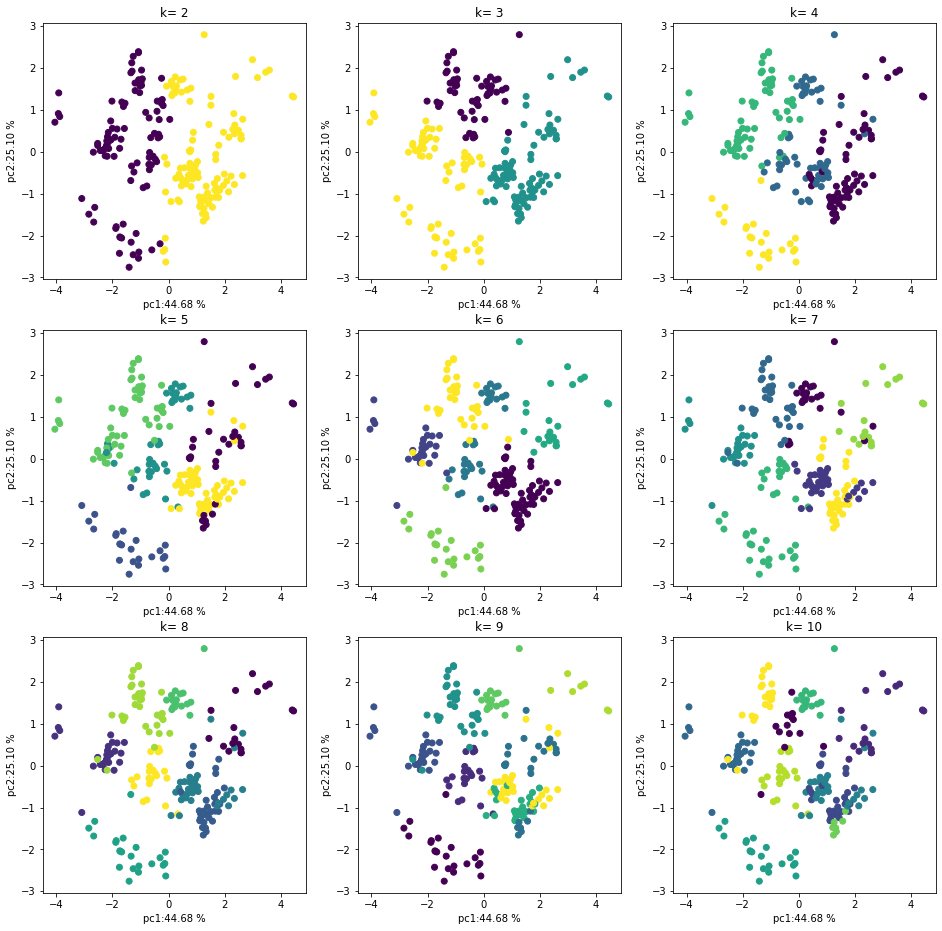

In [175]:
rows=3
columns=3
f, axes = plt.subplots(rows,columns, figsize=(16, 16))
count=2
for i in range(rows):
    for j in range(columns):
        kmeans = KMeans(n_clusters=count, random_state=23)
        df=pca_data[["pc1","pc2"]].copy()
        df["clusters"]=kmeans.fit_predict(scaled_data)
        axes[i,j].scatter(df["pc1"], df["pc2"],c=df.clusters)      
        axes[i,j].set_title( "k= " + str(count) )
        axes[i,j].set_xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
        axes[i,j].set_ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
        count=count+1

There is a grouped part below. I believe we have to capture that part. From my point of view, k=4 results in best clustering and it prevents overfitting. Now, we can have a look at average silhouette approach to determine best k value.

n_clusters = 2 The average silhouette_score is : 0.2938
n_clusters = 3 The average silhouette_score is : 0.2874
n_clusters = 4 The average silhouette_score is : 0.2955
n_clusters = 5 The average silhouette_score is : 0.3077
n_clusters = 6 The average silhouette_score is : 0.3454
n_clusters = 7 The average silhouette_score is : 0.3402
n_clusters = 8 The average silhouette_score is : 0.3642
n_clusters = 9 The average silhouette_score is : 0.3744
n_clusters = 10 The average silhouette_score is : 0.3914
n_clusters = 11 The average silhouette_score is : 0.4041
n_clusters = 12 The average silhouette_score is : 0.4143
n_clusters = 13 The average silhouette_score is : 0.4285
n_clusters = 14 The average silhouette_score is : 0.4283
n_clusters = 15 The average silhouette_score is : 0.4437
n_clusters = 16 The average silhouette_score is : 0.4320
n_clusters = 17 The average silhouette_score is : 0.4462
n_clusters = 18 The average silhouette_score is : 0.4484
n_clusters = 19 The average silhouette_

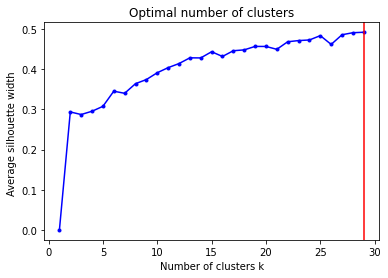

In [176]:
sil_avg = [0]
K = range(2,30)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    cluster_labels=kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)


plt.plot(range(1,len(sil_avg)+1), sil_avg, "b.-")
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
plt.show()  

Even with max k=30, this algorithm suggests us to use 30 clusters. When we draw the clusters with k=30:

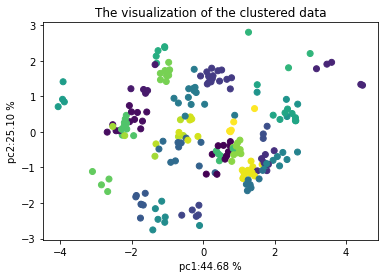

In [177]:
kmeans = KMeans(n_clusters=30, random_state=123)
df=pca_data[["pc1","pc2"]].copy()
df["clusters"]=kmeans.fit_predict(scaled_data)
plt.scatter(df["pc1"], df["pc2"],c=df.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

I believe this is heavily overfitting. Altough our data does not seem to be heavily clustered, I still believe for analysis purposes, 4 will be the optimal cluster number here as it at least captures the separate part below the graph.

<h4>Agglomerative Clustering</h4>

Here, I apply agglomerative clustering algortihm, a type of hierarchical clustering. First, I will try to determine max numbers of clusters by silhouette analysis.

n_clusters = 2 The average silhouette_score is : 0.2888
n_clusters = 3 The average silhouette_score is : 0.2958
n_clusters = 4 The average silhouette_score is : 0.2854
n_clusters = 5 The average silhouette_score is : 0.3211
n_clusters = 6 The average silhouette_score is : 0.3435
n_clusters = 7 The average silhouette_score is : 0.3513
n_clusters = 8 The average silhouette_score is : 0.3562
n_clusters = 9 The average silhouette_score is : 0.3678
n_clusters = 10 The average silhouette_score is : 0.3907
n_clusters = 11 The average silhouette_score is : 0.3963
n_clusters = 12 The average silhouette_score is : 0.4051
n_clusters = 13 The average silhouette_score is : 0.4186
n_clusters = 14 The average silhouette_score is : 0.4272
n_clusters = 15 The average silhouette_score is : 0.4451
n_clusters = 16 The average silhouette_score is : 0.4559
n_clusters = 17 The average silhouette_score is : 0.4637
n_clusters = 18 The average silhouette_score is : 0.4720
n_clusters = 19 The average silhouette_

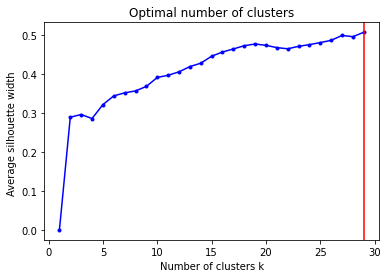

In [178]:
sil_avg = [0]
K = range(2,30)
for k in K:
    agg = AgglomerativeClustering(n_clusters=k)
    cluster_labels=agg.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)


plt.plot(range(1,len(sil_avg)+1), sil_avg, "b.-")
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
plt.show()    

Just like k-means, this algorithm suggests many numbers of clusters, which will cause an overfitting problem. So, I decide to visualize.

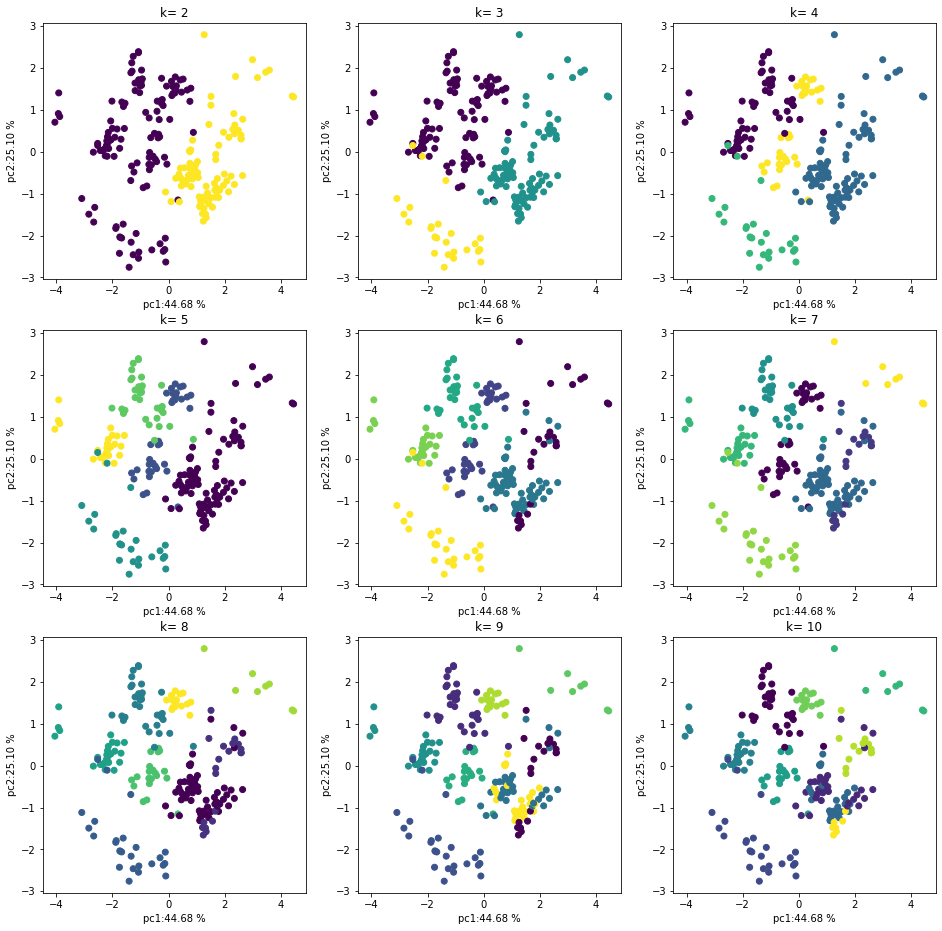

In [179]:
rows=3
columns=3
f, axes = plt.subplots(rows,columns, figsize=(16, 16))
count=2
for i in range(rows):
    for j in range(columns):
        agg = AgglomerativeClustering(n_clusters=count)
        df=pca_data[["pc1","pc2"]].copy()
        df["clusters"]=agg.fit_predict(scaled_data)
        axes[i,j].scatter(df["pc1"], df["pc2"],c=df.clusters)      
        axes[i,j].set_title( "k= " + str(count) )
        axes[i,j].set_xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
        axes[i,j].set_ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
        count=count+1

Here, k=7 seems the best as it group down below ones as a cluster and also upper ones as another cluster. However, 3 and 4 are also okay.

When we compare it with k-means clustering, we see that their clusters are somewhat similar but there are some differences. For example, middle part in k=3 differs a lot from k-means to agglomerative clustering.

<h3>Question 8</h3>

First, I will apply PCA to original dataset.

In [180]:
pca = PCA()
pca_data = pca.fit_transform(data)
pca_data = pd.DataFrame(pca_data, columns=["pc1","pc2","pc3","pc4","pc5","pc6"])
print("pca.explained variance ratio:\n", pca.explained_variance_ratio_)

pca.explained variance ratio:
 [8.16787402e-01 1.80375398e-01 1.33983732e-03 1.09406629e-03
 2.37782533e-04 1.65513765e-04]


As we can see, first two components explain almost 99% of the variance, so 2 principal components will be used. Now, I will divide this data into train and test datasets.

In [181]:
features = ['x1', 'x2', 'x3', 'x4', 'x5']
x = data.loc[:, features].values
y = data.loc[:,['y']].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
pc = pd.concat([principalDf, data[['y']]], axis = 1)
pc.head(5)

,pc1,pc2,y
0,21.983396,-4.862196,0
1,-24.411332,-7.262891,3
2,3.425844,5.391150,0
3,-34.090747,6.026640,0
4,17.943132,14.338620,1


Now, I can divide this dataset into train and test as I did in question 6.

In [182]:
pcx = pd.DataFrame(pc.iloc[:, :-1].values, columns = ['pc1','pc2'])
pcy = pd.DataFrame(pc.iloc[:,-1].values, columns = ['y'])
pcxtr, pcxts, pcytr, pcyts = train_test_split(pcx, pcy, test_size=0.2, random_state=123)

Now, I will apply two classification model I have used in question 6.

<h4>Support Vector Machine</h4>

First classification method I will be utilizing is support vector machine with linear kernel. C is chosen as 2 to make decision surface smooth and gamma is set to automatic. For each model, method is used. Results will be commented below.

In [183]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(pcxtr, pcytr.values.ravel())
pcy_predictsvm = classifier.predict(pcxts)
print(classification_report(pcyts, pcy_predictsvm))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.86      0.75      0.80        16
           2       0.71      0.71      0.71         7
           3       0.86      0.67      0.75         9

    accuracy                           0.74        42
   macro avg       0.75      0.73      0.73        42
weighted avg       0.77      0.74      0.74        42



<h4>Logistic Regression</h4>

For my second classification method, I am applying logistic regression. To be similar with SVM, I am using C as 2. Solver will be liblinear as it supports both L1 and L2 regularization (in logistic regression, regularization is applied by default by Python). Random state is used for shuffling purposes. As in SVM, visualization methods are not very useful here, so I will not be using them.

In [184]:
classifier = LogisticRegression(solver='liblinear', random_state=2, C=2)
classifier.fit(pcxtr, pcytr.values.ravel())
pcy_predictlr = classifier.predict(pcxts)
print(classification_report(pcyts, pcy_predictlr))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.87      0.81      0.84        16
           2       0.62      0.71      0.67         7
           3       0.83      0.56      0.67         9

    accuracy                           0.74        42
   macro avg       0.74      0.72      0.72        42
weighted avg       0.76      0.74      0.74        42



Now lets check how PCA affected classification results.

In [185]:
variables = np.array(['svm_pca','svm_no_pca','lr_pca','lr_no_pca'])
precision = np.array([0.77,0.75,0.76,0.83])
recall = np.array([0.74,0.74,0.74,0.79])
comparison_table2 = pd.DataFrame({'Variable':variables, 'Precision':precision, 'Recall':recall})
HTML(comparison_table2.to_html(index=False))

Variable,Precision,Recall
svm_pca,0.77,0.74
svm_no_pca,0.75,0.74
lr_pca,0.76,0.74
lr_no_pca,0.83,0.79


As we can see, we slightly improved performance of SVM, however, we have decreased the performance of logistic regression classification.

Finally, I will convert PCA dataset into a csv file.

In [186]:
pc.to_csv(r'C:\Users\Lenovo\Desktop\pc.csv')